## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  68.353758  1310.775239  0.539602   5.446076  710.555073
1  10.377712  1672.898254  0.460241   7.477875  769.862291
2  48.969579   561.920174  0.138281  10.621465   91.823304
3  79.052727   436.615416  0.536139   9.817754  247.115378
4  57.154640   509.717149  0.618120   6.983584  320.047745


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9446999	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9359490	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9253809	total: 59ms	remaining: 19.6s
3:	learn: 0.9145467	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9025581	total: 60ms	remaining: 11.9s
5:	learn: 0.8925144	total: 60.4ms	remaining: 10s
6:	learn: 0.8810942	total: 60.9ms	remaining: 8.64s
7:	learn: 0.8685155	total: 61.6ms	remaining: 7.63s
8:	learn: 0.8582909	total: 62.3ms	remaining: 6.86s
9:	learn: 0.8476798	total: 62.8ms	remaining: 6.22s
10:	learn: 0.8373674	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8244948	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8142476	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8035787	total: 64.9ms	remaining: 4.57s
14:	learn: 0.7944121	total: 65.3ms	remaining: 4.29s
15:	learn: 0.7852711	total: 66ms	remaining: 4.06s
16:	learn: 0.7760928	total: 66.3ms	remaining: 3.84s
17:	learn: 0.7669672	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7604609	total: 67.2ms	remaining: 3.47s
1

126:	learn: 0.2367904	total: 117ms	remaining: 805ms
127:	learn: 0.2345721	total: 118ms	remaining: 802ms
128:	learn: 0.2323247	total: 118ms	remaining: 798ms
129:	learn: 0.2299553	total: 119ms	remaining: 794ms
130:	learn: 0.2279601	total: 119ms	remaining: 790ms
131:	learn: 0.2261675	total: 120ms	remaining: 787ms
132:	learn: 0.2241637	total: 120ms	remaining: 782ms
133:	learn: 0.2222575	total: 120ms	remaining: 779ms
134:	learn: 0.2202404	total: 121ms	remaining: 774ms
135:	learn: 0.2185843	total: 121ms	remaining: 770ms
136:	learn: 0.2169890	total: 122ms	remaining: 767ms
137:	learn: 0.2153193	total: 122ms	remaining: 764ms
138:	learn: 0.2135287	total: 123ms	remaining: 760ms
139:	learn: 0.2114894	total: 123ms	remaining: 757ms
140:	learn: 0.2096756	total: 124ms	remaining: 754ms
141:	learn: 0.2077990	total: 124ms	remaining: 751ms
142:	learn: 0.2060248	total: 125ms	remaining: 748ms
143:	learn: 0.2043069	total: 125ms	remaining: 744ms
144:	learn: 0.2027070	total: 126ms	remaining: 741ms
145:	learn: 

275:	learn: 0.0911857	total: 185ms	remaining: 486ms
276:	learn: 0.0908423	total: 186ms	remaining: 485ms
277:	learn: 0.0904021	total: 186ms	remaining: 484ms
278:	learn: 0.0901305	total: 187ms	remaining: 482ms
279:	learn: 0.0898824	total: 187ms	remaining: 482ms
280:	learn: 0.0896352	total: 188ms	remaining: 480ms
281:	learn: 0.0893886	total: 188ms	remaining: 479ms
282:	learn: 0.0891256	total: 189ms	remaining: 478ms
283:	learn: 0.0887918	total: 189ms	remaining: 477ms
284:	learn: 0.0884956	total: 189ms	remaining: 475ms
285:	learn: 0.0882275	total: 190ms	remaining: 474ms
286:	learn: 0.0879698	total: 190ms	remaining: 472ms
287:	learn: 0.0876608	total: 191ms	remaining: 471ms
288:	learn: 0.0874298	total: 191ms	remaining: 470ms
289:	learn: 0.0871841	total: 191ms	remaining: 469ms
290:	learn: 0.0868247	total: 192ms	remaining: 468ms
291:	learn: 0.0865283	total: 192ms	remaining: 467ms
292:	learn: 0.0861198	total: 193ms	remaining: 465ms
293:	learn: 0.0859064	total: 193ms	remaining: 464ms
294:	learn: 

531:	learn: 0.0343281	total: 300ms	remaining: 264ms
532:	learn: 0.0342216	total: 300ms	remaining: 263ms
533:	learn: 0.0341497	total: 301ms	remaining: 263ms
534:	learn: 0.0340061	total: 301ms	remaining: 262ms
535:	learn: 0.0337946	total: 302ms	remaining: 261ms
536:	learn: 0.0336575	total: 302ms	remaining: 261ms
537:	learn: 0.0335244	total: 303ms	remaining: 260ms
538:	learn: 0.0333339	total: 303ms	remaining: 259ms
539:	learn: 0.0332059	total: 304ms	remaining: 259ms
540:	learn: 0.0331099	total: 304ms	remaining: 258ms
541:	learn: 0.0329248	total: 305ms	remaining: 257ms
542:	learn: 0.0327435	total: 305ms	remaining: 257ms
543:	learn: 0.0326223	total: 306ms	remaining: 256ms
544:	learn: 0.0325353	total: 306ms	remaining: 255ms
545:	learn: 0.0324174	total: 306ms	remaining: 255ms
546:	learn: 0.0323029	total: 307ms	remaining: 254ms
547:	learn: 0.0321293	total: 307ms	remaining: 253ms
548:	learn: 0.0319975	total: 308ms	remaining: 253ms
549:	learn: 0.0318281	total: 308ms	remaining: 252ms
550:	learn: 

682:	learn: 0.0191075	total: 368ms	remaining: 171ms
683:	learn: 0.0190006	total: 369ms	remaining: 170ms
684:	learn: 0.0189517	total: 369ms	remaining: 170ms
685:	learn: 0.0189036	total: 369ms	remaining: 169ms
686:	learn: 0.0188292	total: 370ms	remaining: 169ms
687:	learn: 0.0187248	total: 370ms	remaining: 168ms
688:	learn: 0.0186776	total: 371ms	remaining: 167ms
689:	learn: 0.0186311	total: 371ms	remaining: 167ms
690:	learn: 0.0185584	total: 372ms	remaining: 166ms
691:	learn: 0.0184565	total: 372ms	remaining: 166ms
692:	learn: 0.0184108	total: 373ms	remaining: 165ms
693:	learn: 0.0183659	total: 373ms	remaining: 165ms
694:	learn: 0.0183216	total: 374ms	remaining: 164ms
695:	learn: 0.0182515	total: 374ms	remaining: 163ms
696:	learn: 0.0181521	total: 375ms	remaining: 163ms
697:	learn: 0.0180839	total: 375ms	remaining: 162ms
698:	learn: 0.0180172	total: 375ms	remaining: 162ms
699:	learn: 0.0179603	total: 376ms	remaining: 161ms
700:	learn: 0.0178853	total: 376ms	remaining: 161ms
701:	learn: 

938:	learn: 0.0078093	total: 482ms	remaining: 31.3ms
939:	learn: 0.0077993	total: 483ms	remaining: 30.8ms
940:	learn: 0.0077842	total: 483ms	remaining: 30.3ms
941:	learn: 0.0077624	total: 483ms	remaining: 29.8ms
942:	learn: 0.0077394	total: 484ms	remaining: 29.2ms
943:	learn: 0.0077181	total: 484ms	remaining: 28.7ms
944:	learn: 0.0076880	total: 485ms	remaining: 28.2ms
945:	learn: 0.0076736	total: 485ms	remaining: 27.7ms
946:	learn: 0.0076455	total: 486ms	remaining: 27.2ms
947:	learn: 0.0076179	total: 486ms	remaining: 26.7ms
948:	learn: 0.0075909	total: 487ms	remaining: 26.2ms
949:	learn: 0.0075639	total: 487ms	remaining: 25.6ms
950:	learn: 0.0075433	total: 488ms	remaining: 25.1ms
951:	learn: 0.0075185	total: 488ms	remaining: 24.6ms
952:	learn: 0.0074891	total: 489ms	remaining: 24.1ms
953:	learn: 0.0074689	total: 489ms	remaining: 23.6ms
954:	learn: 0.0074448	total: 490ms	remaining: 23.1ms
955:	learn: 0.0074286	total: 490ms	remaining: 22.5ms
956:	learn: 0.0073998	total: 490ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


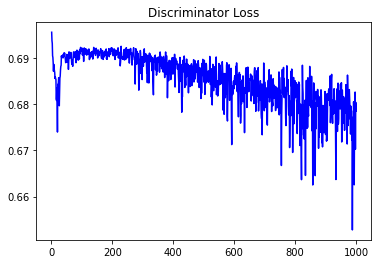

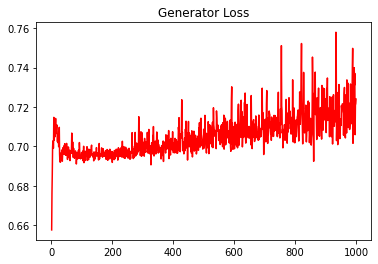

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008443098962956298


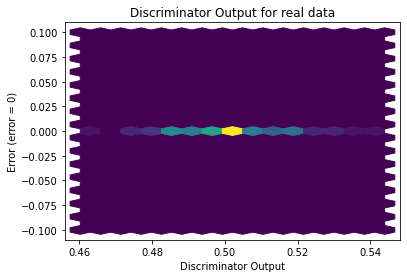

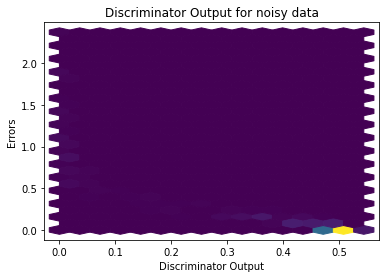

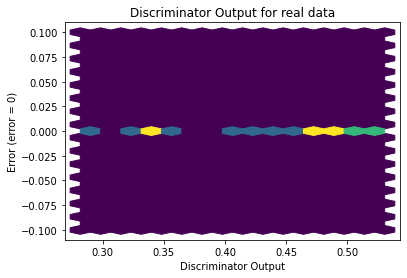

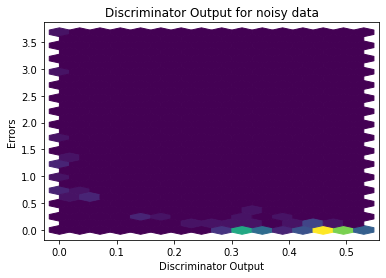

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1277]], requires_grad=True)
